# MTH9879 Homework 7

Assigned: March 29, 2017.
Due: April 25, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### R version 3.3.2 (2016-10-31) (ubuntu)

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

#### <font color=blue> Solution </font>

From above,  

$$\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$$
where $\alpha < 1$
we know

$$\Var[\epsilon_i] = 0$$
Thus,

$$
\Var[X_{t+\tau}-X_t] = \Var[\sum_{i=t+1}^{t + \tau}\,\epsilon_i] 
= \sum_{i,j = t+1}^{t + \tau} \Cov(\epsilon_i ,\, \epsilon_j) 
= \sum_{i,j = t+1}^{t + \tau} \E(\epsilon_i \epsilon_j) \\
\sim 2 \sum_{i = 1}^{\tau - 1} (\tau - i)i^{- \alpha} 
\approx 2\int_{1}^{\tau - 1}(\tau - x)x^{- \alpha}dx  
\sim \tau ^{2\,H}
$$


## MSFT data from Alejandro Ca&ntilde;ete

In [1]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



### 2. (10 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.
#### <font color=blue> Solution (a) </font>

In [2]:
tradeSign <- sign(msft130311.inet$signed.shares)

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$
#### <font color=blue> Solution (b) </font>

In [3]:
ar1_model <- ar(tradeSign, order.max = 1)
predict(ar1_model, n.head=1)

$pred
Time Series:
Start = 16059 
End = 16059 
Frequency = 1 
[1] -0.8057477

$se
Time Series:
Start = 16059 
End = 16059 
Frequency = 1 
[1] 0.5688566


(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?
#### <font color=blue> Solution (c) </font>

In [4]:
# autocorrelation
acf1 <- acf(tradeSign, plot=F)
# mean squared error of AR(1)
resids <- ar1_model$resid
resids <- resids[!is.na(resids)]
ar1_mse <- mean(resids^2)

acf1[1]
cat("--------------------------------------------------------------------------\n")
cat("phi_1 is", ar1_model$ar)
cat("\nautocorrelation coefficients of tradeSign (lag = 1) is the same with phi_1")
cat("\nThe mean-squared error of AR(1) is", ar1_mse)


Autocorrelations of series ‘tradeSign’, by lag

    1 
0.821 

--------------------------------------------------------------------------
phi_1 is 0.8210177
autocorrelation coefficients of tradeSign (lag = 1) is the same with phi_1
The mean-squared error of AR(1) is 0.3234549

(d) Fit an $AR(p)$ model to the tradeSign data, allowing R to find the best value of $p$ using the default AIC criterion. This generates the forecast: $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$
#### <font color=blue> Solution (d) </font>

In [5]:
arp_model <- ar(tradeSign)
predict(arp_model, n.head=1)

$pred
Time Series:
Start = 16059 
End = 16059 
Frequency = 1 
[1] -0.6800992

$se
Time Series:
Start = 16059 
End = 16059 
Frequency = 1 
[1] 0.5582308


(e) What value of $p$ is selected by R? What is the mean-squared error of this AR(p) forecast?
#### <font color=blue> Solution (e) </font>

In [6]:
# mean squared error of AR(1)
resids_new <- arp_model$resid
resids_new <- resids_new[!is.na(resids_new)]
arp_mse <- mean(resids_new^2)

cat("order selected", arp_model$order)
cat("\nThe mean-squared error of AR(p) is", arp_mse)

order selected 14
The mean-squared error of AR(p) is 0.3105728

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.
#### <font color=blue> Solution (a) </font>

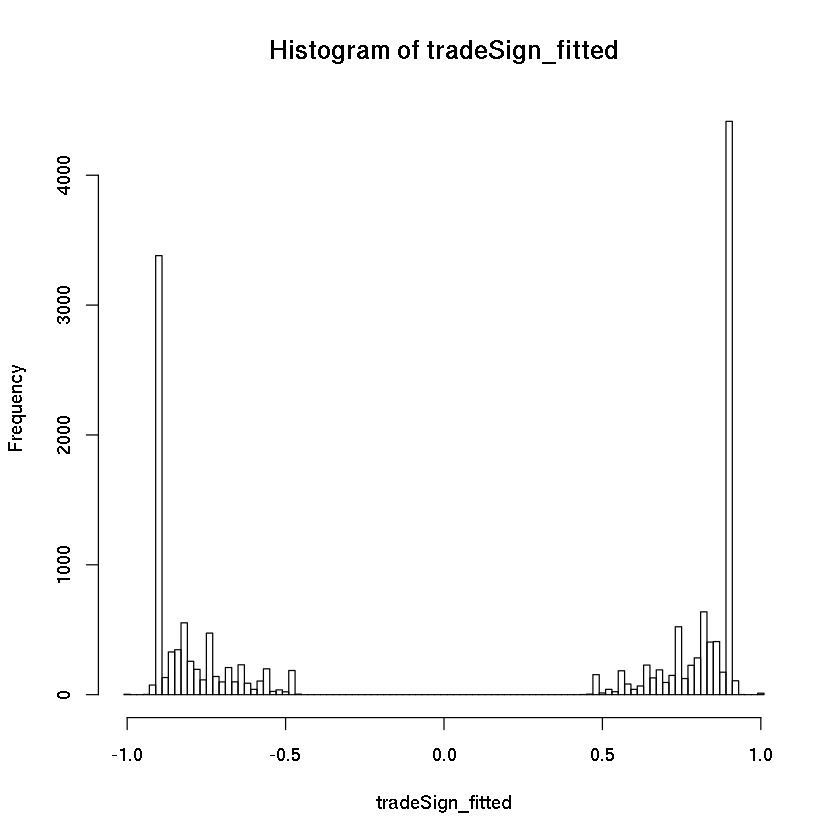

In [7]:
tradeSign_fitted <- c()
num_order <- arp_model$order
# set initial value
for (i in 1 : num_order){
    tradeSign_fitted <- c(tradeSign_fitted,tradeSign[i])
}

# compute the fitted value from ar(p)
for (i in (num_order+1) : length(tradeSign)){
    tradeSign_fitted <- c(tradeSign_fitted, 0.)
    for (j in 1 : num_order){
        tradeSign_fitted[i] <-tradeSign_fitted[i] + tradeSign[i-j] * arp_model$ar[j]
    }
}

# draw the histgram
hist(tradeSign_fitted, breaks = seq(-1.01,1.01,by=0.02))

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).
#### <font color=blue> Solution (b) </font>

The slope is as follows:

a_f 
0.9838313

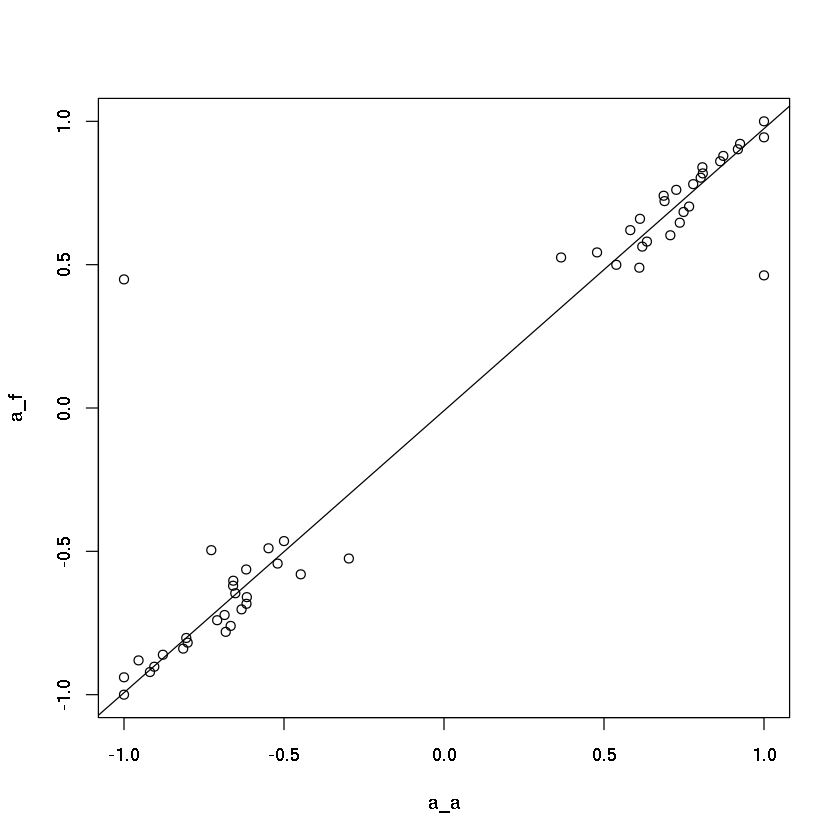

In [8]:
num_bin <- (1.01-(-1.01))/0.02
avg_actual <- rep(0., num_bin)
avg_forecast <- rep(0., num_bin)

for (i in 1:num_bin){
    count <- 0
    for (j in 1 : length(tradeSign)){
        if (((-1.01+0.02*(i-1) < tradeSign_fitted[j])) && (tradeSign_fitted[j] <= (-1.01+0.02*i))){
            count <- count + 1
            avg_actual[i] <- avg_actual[i] + tradeSign[j]
            avg_forecast[i] <- avg_forecast[i] + tradeSign_fitted[j]
        }
    }
    avg_actual[i] <- avg_actual[i] / count
    avg_forecast[i] <- avg_forecast[i] / count
}

# draw the plot
a_a <- avg_actual[!is.na(avg_actual)]
a_f <- avg_forecast[!is.na(avg_forecast)]
plot(a_a, a_f)

# compute the slope
fit_model <- lm(a_a ~ a_f)
abline(fit_model)
cat("The slope is as follows:")
fit_model$coef[2]

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?
#### <font color=blue> Solution (c) </font>

From definition we know

$$
\hat \epsilon = 1 \times p + (-1) \times (1-p) = 2p-1
$$

So the probability p that the next trade will be a market buy is
$$
p = \frac{\hat \epsilon + 1}{2}
$$